#### Understanding Oversampling 

#### If you have a dataset where you need to classify data into two categories:  
#### - **Category 1** (labeled as **'1'** or **'yes'**) appears **900 times** (majority class).  
#### - **Category 2** (labeled as **'0'** or **'no'**) appears **100 times** (minority class).  

#### Since the number of ‘1’s is much higher than ‘0’s, the model might learn to predict ‘1’ more often because it appears more frequently. This creates an **imbalance**, leading to a biased model that does not learn properly from the minority class.  

---

#### How to Fix This? (Oversampling)  
#### To balance the dataset, we **increase the number of samples in the minority class ('0')** until it matches the majority class ('1').  

#### Steps:  
#### 1. Identify the **majority class** (here, ‘1’) and the **minority class** (here, ‘0’).  
#### 2. Duplicate or generate new synthetic samples for the minority class until its size equals the majority class.  
####    - In this example, we **increase '0' from 100 to 900**, so that both classes have **900 samples each**.  
#### 3. Train the model on this **balanced dataset** using a suitable machine learning algorithm.  

---

#### Why Do We Do This?  
#### - **To avoid bias:** If the dataset is unbalanced, the model might predict only the majority class.  
#### - **To improve learning:** A balanced dataset helps the model understand both categories equally.  


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [40]:
X, y = make_classification(n_samples=500, n_features=2,n_redundant=0, weights=[0.9, 0.1], random_state=19)

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

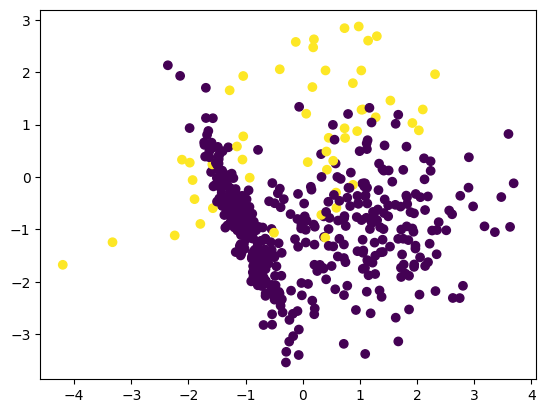

In [42]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')

## Before sampling

In [43]:
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

In [44]:
clf_before = LogisticRegression()
clf_before.fit(X_train,y_train)

LogisticRegression()

<Axes: >

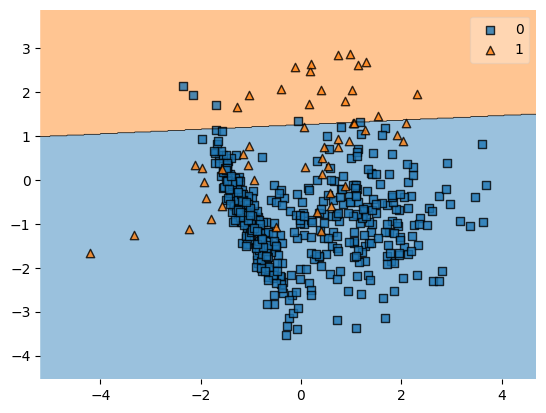

In [45]:
plot_decision_regions(X,y,clf_before)

## After Sampling

In [46]:
ros = RandomOverSampler(random_state=4)
X_samp, y_samp = ros.fit_resample(X_train,y_train)

In [47]:
X_samp.shape

(716, 2)

In [48]:
count_zero = sum(y_samp==0)
count_one = sum(y_samp==1)
print("count of zero: ",count_zero)
print("count of one: ",count_one)

count of zero:  358
count of one:  358


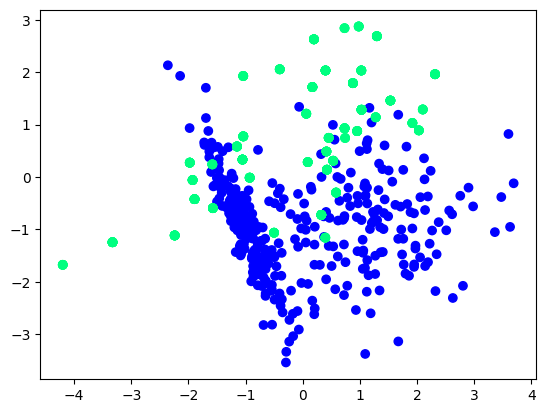

In [49]:
plt.scatter(X_samp[:,0],X_samp[:,1],c=y_samp,cmap='winter')

In [50]:
pd.Series(y_train).value_counts()

0    358
1     42
Name: count, dtype: int64

In [51]:
pd.Series(y_samp).value_counts()

0    358
1    358
Name: count, dtype: int64

In [52]:
clf = LogisticRegression()

<Axes: >

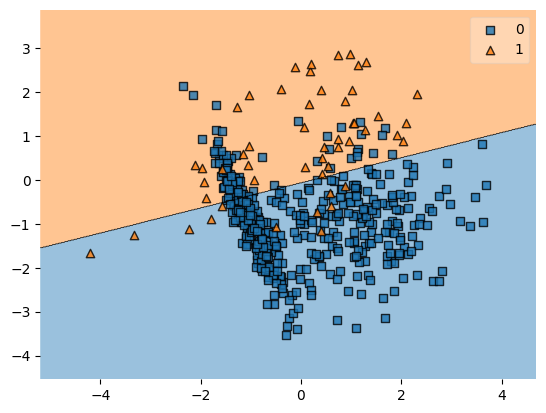

In [53]:
clf.fit(X_samp,y_samp)
plot_decision_regions(X,y,clf)

##### Key Takeaway  
##### Oversampling helps **balance the dataset by increasing the minority class** so the model can learn from both classes fairly. However, adding duplicated data can sometimes lead to overfitting, so techniques like **SMOTE (Synthetic Minority Over-sampling Technique)** can be used to generate new synthetic samples instead of simple duplication.